Regression. Tutors - expected math exam results
Geekbrains Algorithms for analyze data. Predict average math exam results for students of the tutors

Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from imblearn import over_sampling, under_sampling
import matplotlib.pyplot as plt
import seaborn as sns

### скачаем данные в переменные для работы

In [2]:
data = pd.read_csv("gb-tutors-expected-math-exam-results/train.csv")
df=pd.read_csv('gb-tutors-expected-math-exam-results/test.csv')

### посмотрим на распределение целевой переменной и данные

In [3]:
data

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,83
9996,9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,58
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,62
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56


In [4]:
df

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,42.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,19996,51.0,2.0,2200.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,19997,33.0,5.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,19998,48.0,0.0,1750.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
feature_names=data.keys()
feature_names2=df.keys()
feature_names

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

In [6]:
X = pd.DataFrame(data, columns=feature_names)
X_df=pd.DataFrame(df, columns=feature_names2)

### уберем колонку с id из тренировочных данных

In [7]:
X=X.drop(['Id'], axis=1)

In [8]:
X_df=X_df.drop(['Id'], axis=1)

In [9]:
### запишем целевое значение в переменную 'y'

In [10]:
y = X['mean_exam_points']
y

0       61
1       76
2       53
3       54
4       57
        ..
9995    83
9996    58
9997    62
9998    56
9999    52
Name: mean_exam_points, Length: 10000, dtype: int64

In [11]:
X=X.drop('mean_exam_points', axis=1)

<!-- разделим дату на тест и треин -->

### функции для вычисления ошибки

In [12]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

<!-- Нормализ  -->

In [13]:
# def min_max_scale(X):
#     return (X - X.min()) / (X.max() - X.min())

In [14]:
# X_norm = X.copy()
# X_norm = X_norm.astype(np.float64)
# X_st=min_max_scale(X_norm)

In [15]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [16]:
X_st = X.copy()
X_st = X_st.astype(np.float64)
X_st = standard_scale(X)
X_st

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,-0.730737,-1.121084,-0.569847,-0.908157,1.290930,-0.391477,-0.350825,-0.238205,5.490868,-0.140648
1,0.263801,1.135981,2.192654,1.616254,1.290930,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
2,-0.855055,-1.121084,-0.950881,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
3,0.015167,1.700247,-0.569847,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
4,-0.357785,-0.556818,-0.379330,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
...,...,...,...,...,...,...,...,...,...,...
9995,-0.233468,-1.121084,0.001705,0.354049,1.290930,2.554173,-0.350825,-0.238205,-0.182102,-0.140648
9996,0.636754,-1.121084,0.001705,0.354049,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
9997,-1.476642,-0.556818,-0.855623,-0.908157,1.290930,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
9998,-1.600959,0.571714,-1.141399,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648


In [17]:
X_st2 = X_df.copy()
X_st2 = X_df.astype(np.float64)
X_st2 = standard_scale(X_df)
X_st2

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,0.003419,0.571977,-1.234296,-0.894033,-0.785004,2.663917,-0.369431,-0.243549,-0.180041,-0.136905
1,-0.373642,0.571977,0.291657,0.366234,-0.785004,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905
2,0.757540,-0.549547,-0.280575,-0.894033,1.273752,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905
3,1.385974,2.254262,2.294470,1.626501,1.273752,-0.375349,2.706596,-0.243549,-0.180041,-0.136905
4,-0.247955,1.132739,2.771331,1.626501,1.273752,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905
...,...,...,...,...,...,...,...,...,...,...
9995,-0.499329,-1.110308,-0.375947,-0.894033,-0.785004,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905
9996,0.631853,0.011215,0.959262,1.626501,-0.785004,2.663917,-0.369431,-0.243549,-0.180041,-0.136905
9997,-1.630511,1.693500,-1.138923,-0.894033,-0.785004,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905
9998,0.254792,-1.110308,0.100913,0.366234,-0.785004,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905


In [18]:
n_features=X_st.shape[1]
n_features

10

### создадим матрицу из единиц и прибавим к тренировочному датасету для вычисления линейной регрессии с коэффициентом b0

In [19]:
n = X_st.shape[0]
ones=np.ones(n)
ones=pd.Series(ones)
ones.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [20]:
# X_st2['ones']=ones
X_st.insert(0, "one", ones)

In [21]:
X_st.head()

,one,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,1.0,-0.730737,-1.121084,-0.569847,-0.908157,1.290930,-0.391477,-0.350825,-0.238205,5.490868,-0.140648
1,1.0,0.263801,1.135981,2.192654,1.616254,1.290930,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
2,1.0,-0.855055,-1.121084,-0.950881,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
3,1.0,0.015167,1.700247,-0.569847,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
4,1.0,-0.357785,-0.556818,-0.379330,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648


<!-- разделим на тест и траин стандартизированный датасет -->

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X_st, y, train_size=0.7,random_state=33,shuffle=False)

In [23]:
# !убрал разбивку на тест и траин из финального проекта

### переставим в начало столбец с единичками

In [25]:
X_st2.insert(0, "one", ones)
X_st2.head()
X_st2.head()

,one,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,1.0,0.003419,0.571977,-1.234296,-0.894033,-0.785004,2.663917,-0.369431,-0.243549,-0.180041,-0.136905
1,1.0,-0.373642,0.571977,0.291657,0.366234,-0.785004,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905
2,1.0,0.757540,-0.549547,-0.280575,-0.894033,1.273752,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905
3,1.0,1.385974,2.254262,2.294470,1.626501,1.273752,-0.375349,2.706596,-0.243549,-0.180041,-0.136905
4,1.0,-0.247955,1.132739,2.771331,1.626501,1.273752,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905


In [26]:
#Аналитическое решение. не используем тут
# y_pred_analytical = X_st @ W
# y_pred_analytical

In [27]:
# def gradient_descent_reg_l2(X, y, iterations, eta=2e-3, reg=1e-1):
iterations=2000
eta=2e-3
reg=1e-2
W = np.random.randn(X_st.shape[1])
n = X_st.shape[0]

for i in range(0, iterations):
    y_pred = np.dot(X_st, W)
    err = calc_mse(y, y_pred)

    dQ = 2/n * X_st.T @ (y_pred - y) # градиент функции ошибки
    dReg = reg * W # градиент регуляризации

    W -= eta * (dQ + dReg)

    if i % (iterations / 100) == 0:
        print(f'Iter: {i}, weights: /n{W}, error {err}')

print(f'Final MSE: {calc_mse(y, np.dot(X_st, W))}')

Iter: 0, weights: /none                    0.978191
age                   -0.079791
years_of_experience   -0.365730
lesson_price          -2.215791
qualification         -0.794580
physics                0.194086
chemistry              1.125035
biology                0.854010
english               -0.182593
geography             -1.323766
history                0.408345
dtype: float64, error 4262.653700764785
Iter: 20, weights: /none                    5.811348
age                   -0.080486
years_of_experience   -0.092039
lesson_price          -1.267595
qualification          0.168348
physics                0.368940
chemistry              1.049732
biology                0.814922
english               -0.163986
geography             -1.203621
history                0.379406
dtype: float64, error 3625.1721272668474
Iter: 40, weights: /none                    10.270408
age                    -0.081969
years_of_experience     0.130243
lesson_price           -0.452127
qualification        

Iter: 420, weights: /none                    51.919182
age                    -0.117175
years_of_experience     0.715477
lesson_price            4.287456
qualification           6.015155
physics                 2.033484
chemistry               0.299355
biology                 0.506589
english                 0.110366
geography              -0.112347
history                 0.112757
dtype: float64, error 238.80250944950777
Iter: 440, weights: /none                    52.809388
age                    -0.117536
years_of_experience     0.695519
lesson_price            4.327858
qualification           6.067038
physics                 2.065770
chemistry               0.284070
biology                 0.502016
english                 0.117467
geography              -0.092590
history                 0.108091
dtype: float64, error 218.22341652980865
Iter: 460, weights: /none                    53.630689
age                    -0.117777
years_of_experience     0.675668
lesson_price            4.3

Iter: 820, weights: /none                    61.124139
age                    -0.111888
years_of_experience     0.421937
lesson_price            4.547291
qualification           6.454445
physics                 2.369318
chemistry               0.138171
biology                 0.463569
english                 0.187288
geography               0.086770
history                 0.068247
dtype: float64, error 103.98575269497425
Iter: 840, weights: /none                    61.301859
age                    -0.111386
years_of_experience     0.413959
lesson_price            4.547813
qualification           6.461753
physics                 2.375878
chemistry               0.134959
biology                 0.462869
english                 0.188846
geography               0.090441
history                 0.067538
dtype: float64, error 103.07637031411721
Iter: 860, weights: /none                    61.465824
age                    -0.110890
years_of_experience     0.406486
lesson_price            4.5

Iter: 1240, weights: /none                    62.997294
age                    -0.103749
years_of_experience     0.330007
lesson_price            4.525626
qualification           6.548199
physics                 2.438775
chemistry               0.103925
biology                 0.456819
english                 0.203767
geography               0.124576
history                 0.061790
dtype: float64, error 97.61669873800454
Iter: 1260, weights: /none                    63.030028
age                    -0.103506
years_of_experience     0.328192
lesson_price            4.523989
qualification           6.550912
physics                 2.439992
chemistry               0.103318
biology                 0.456723
english                 0.204053
geography               0.125209
history                 0.061715
dtype: float64, error 97.56850214789507
Iter: 1280, weights: /none                    63.060228
age                    -0.103275
years_of_experience     0.326509
lesson_price            4.

Iter: 1660, weights: /none                    63.342305
age                    -0.100630
years_of_experience     0.310435
lesson_price            4.493122
qualification           6.591913
physics                 2.451481
chemistry               0.097574
biology                 0.455944
english                 0.206710
geography               0.131172
history                 0.061255
dtype: float64, error 97.216622460723
Iter: 1680, weights: /none                    63.348335
age                    -0.100559
years_of_experience     0.310098
lesson_price            4.491743
qualification           6.593486
physics                 2.451694
chemistry               0.097468
biology                 0.455934
english                 0.206758
geography               0.131287
history                 0.061256
dtype: float64, error 97.21171271005994
Iter: 1700, weights: /none                    63.353897
age                    -0.100492
years_of_experience     0.309789
lesson_price            4.49

### посчитаем предсказанные значения для тестовых данных, test.csv

In [28]:
y_pred_test = np.dot(X_st2, W)

In [29]:
my_score = pd.DataFrame({
"Id": df['Id'],
"mean_exam_points": y_pred_test,
})
(my_score['mean_exam_points'])

0       50.222477
1       65.127099
2       58.824837
3       89.215115
4       89.763763
          ...    
9995    53.300475
9996    76.469729
9997    50.863464
9998    63.693970
9999    71.727166
Name: mean_exam_points, Length: 10000, dtype: float64

In [30]:
my_score.to_csv('predictions0.csv', index=False, encoding='utf-8')

### посчитаем rmse модели на тренировочных данных, те среднее отклонение модели от целевой переменной всего 9.85 балла ЕГЭ

In [31]:
# np.sqrt(sum((y - y_pred) ** 2)/X_st.shape[0])

9.857581574788266

In [32]:
# посчитаем rmse модели на тесте

In [33]:
# np.sqrt(sum((y - y_pred_analytical) ** 2)/X_st.shape[0])
# Ошибка на аналитичексом решении

Text(0, 0.5, 'Цена занятия')

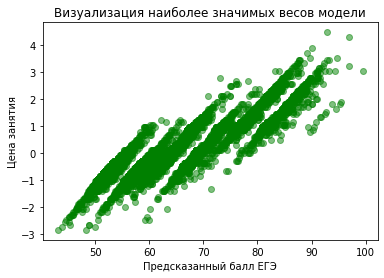

In [62]:
plt.scatter(y_pred_test,X_st2['lesson_price'],c='green',alpha=0.5)
plt.title("Визуализация наиболее значимых весов модели")
plt.xlabel("Предсказанный балл ЕГЭ")
plt.ylabel("Цена занятия")

Text(0, 0.5, 'Квалификация')

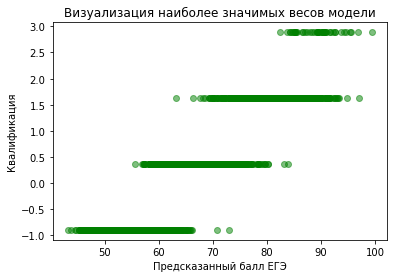

In [54]:
plt.scatter(y_pred_test,X_st2['qualification'],c='green',alpha=0.5)
plt.title("Визуализация наиболее значимых весов модели")
plt.xlabel("Предсказанный балл ЕГЭ")
plt.ylabel("Квалификация")

# Выводы:
    Баллы ЕГЭ линейно зависят от цены и квалификации преподавателя(на графике видно 4 класса), остальные параметры учителя не так важны. Есть некоторый смысл нанимать преподавателя который ведет физику, нежели другие предметы. Ниже список финальных весов модели.

age                    -0.099921
years_of_experience     0.307557
lesson_price            4.473241
qualification           6.613560
physics                 2.453362
chemistry               0.096636
biology                 0.455890
english                 0.207125
geography               0.132282
history                 0.061318